In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
path = '/Users/dangloan/Documents/learning_analytics/project/3_data/clothing_review'
path1 = '/Users/dangloan/Documents/learning_analytics/project/2_code/project_3/women-clothing/pickle'

In [168]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

## Load processed data

In [170]:
# loading in clean_df
df2 = pd.read_pickle(path1 + '/clean_df.pkl')

## Build LSA model

### Find the optimal number of topics

In [ ]:
# ! pip install gensim

In [26]:
import itertools
from gensim import corpora, models

import time
from tqdm import tqdm_notebook as tqdm

list_of_list_of_tokens = df2['tokens'].tolist()
dictionary_LSA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LSA.filter_extremes(no_below=3)
corpus = [dictionary_LSA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

start = 1
end = 30
step = 1
topic_range = range(start, end, step)

coherence_values = []
model_list = []
for num_topics in tqdm(topic_range):
    model = LsiModel(corpus=corpus,num_topics=num_topics,id2word=dictionary_LSA)
    model_list.append(model)
    coherencemodel = models.coherencemodel.CoherenceModel(model=model,
                                                                texts=list_of_list_of_tokens,
                                                                dictionary=dictionary_LSA,
                                                                coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

max_coherence_val = 0
optimal_model = None

# Print the coherence scores
for i, (m,cv) in enumerate(zip(topic_range, coherence_values)):
    if max_coherence_val < round(cv,4):
        optimal_model = model_list[i]
        optimal_num_topics = m
        max_coherence_val = round(cv,4)
        
        print("Numberof topics =", m , "has coherence value of" ,round(cv,4))





Numberof topics = 1 has coherence value of 0.2564
Numberof topics = 2 has coherence value of 0.3164
Numberof topics = 5 has coherence value of 0.3312
Numberof topics = 6 has coherence value of 0.4097


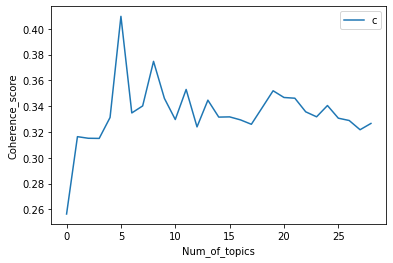

In [28]:
#Plot coherence results
import matplotlib.pyplot as plt
plt.plot(coherence_values)
plt.xlabel("Num_of_topics")
plt.ylabel("Coherence_score")
plt.legend('coherence_values', loc='best')
plt.show() 

In [171]:
import itertools
from gensim import corpora, models
from gensim.models import LsiModel

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...

# df_pos['tokens'] = df_pos['Review_Text_lemmatized'].apply(
#     lambda x : list(itertools.chain.from_iterable(x)))
selected_num_topics = 6
words = 20
list_of_list_of_tokens = df2['tokens'].tolist()
dictionary_LSA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LSA.filter_extremes(no_below=3)
corpus = [dictionary_LSA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = selected_num_topics
%time lsamodel = LsiModel(corpus, num_topics=selected_num_topics, id2word = dictionary_LSA)  # train model

CPU times: user 589 ms, sys: 102 ms, total: 691 ms
Wall time: 541 ms


In [172]:
for i,topic in lsamodel.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.507*"size" + 0.443*"fit" + 0.297*"small" + 0.246*"fabric" + 0.224*"color" + 0.178*"large" + 0.134*"return" + 0.123*"material" + 0.109*"big" + 0.106*"waist" + 0.104*"short" + 0.097*"arm" + 0.091*"quality" + 0.087*"medium" + 0.082*"cut" + 0.081*"retailer" + 0.080*"tight" + 0.078*"petite" + 0.074*"model" + 0.074*"picture"

1: 0.703*"size" + -0.375*"fabric" + -0.341*"color" + -0.259*"fit" + 0.212*"small" + -0.099*"quality" + -0.088*"return" + -0.085*"material" + -0.072*"picture" + 0.070*"large" + -0.067*"wash" + -0.062*"thin" + -0.062*"cut" + -0.061*"design" + -0.061*"price" + -0.059*"soft" + -0.058*"short" + -0.055*"cheap" + -0.053*"little" + -0.049*"front"

2: 0.793*"fit" + -0.478*"fabric" + -0.227*"color" + -0.154*"size" + -0.089*"return" + -0.062*"thin" + -0.061*"quality" + -0.053*"small" + -0.051*"cut" + -0.051*"soft" + -0.043*"design" + -0.037*"retailer" + -0.037*"cheap" + -0.036*"wash" + -0.036*"picture" + -0.031*"front" + -0.030*"store" + -0.029*"little" + -0.029*"lot" + -0.02

There are several overlaping in the result.

## Visualize model output

#### Word Clouds of Top N Keywords in Each Topic

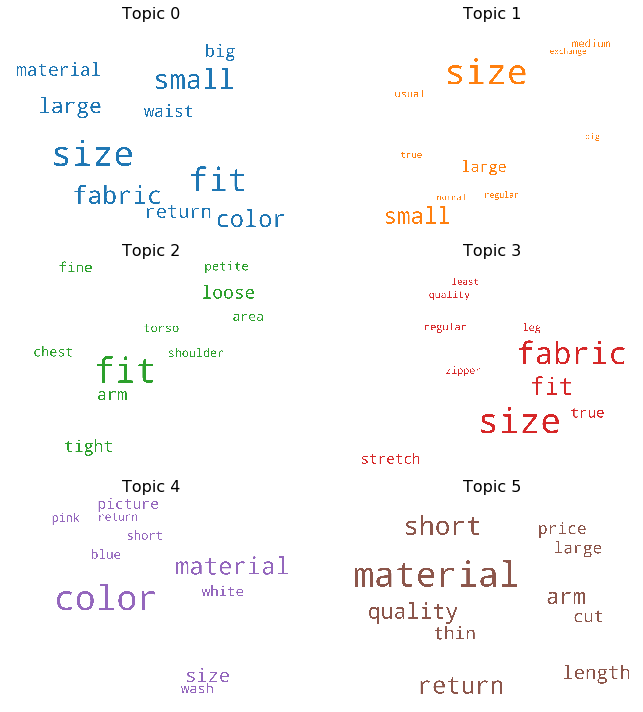

In [189]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS


topics = lsamodel.show_topics(formatted=False,num_words=500)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.imshow(cloud)
    plt.title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

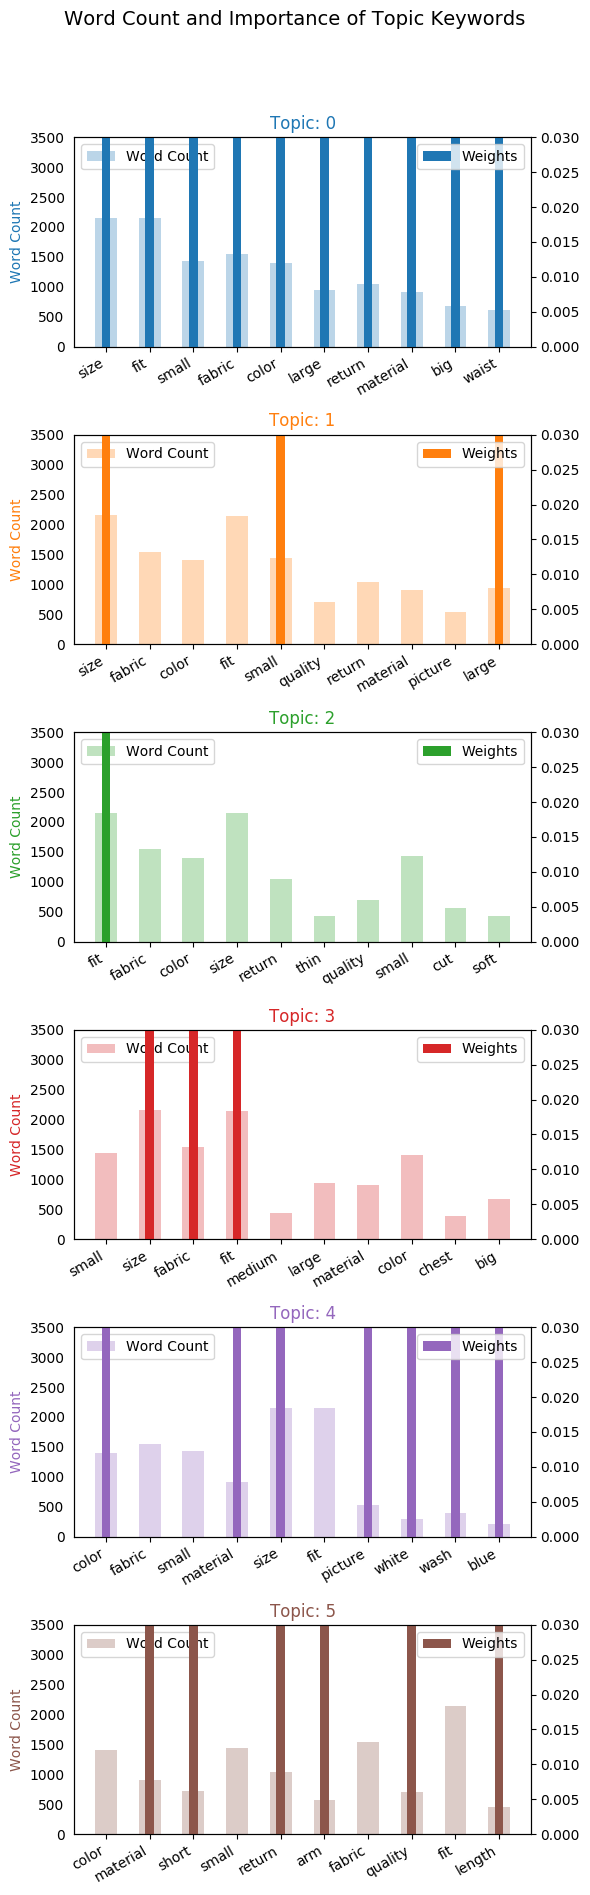

In [177]:
from collections import Counter
topics = lsamodel.show_topics(formatted=False)
data_flat = [w for w_list in list_of_list_of_tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(6, 1, figsize=(6,18), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=14, y=1.05)    
plt.show()

### Assign dominant topic to document:
What is the Dominant topic and its percentage contribution in each document (weight)

In [190]:
topics = [lsamodel[corpus[i]] for i in range(len(df2))]

In [191]:
len(topics)

5278

In [192]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [193]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [194]:
len(document_topic)

5191

In [149]:
# Identify the dominant topic (the topic that has highest weight)
dominant_topic = np.argmax(document_topic.values, axis=1)
dominant_topic_weight = np.max(document_topic.values, axis=1)
document_topic['dominant_topic'] = dominant_topic
document_topic['dominant_topic_weight'] = dominant_topic_weight

In [151]:
document_topic.dominant_topic.value_counts()

0    3410
5    731 
4    337 
2    268 
3    257 
1    188 
Name: dominant_topic, dtype: int64

In [ ]:
# def label_theme(row):
#     if row['dominant_topic'] == 0 :
#         return 'Color/material'
#     if row['dominant_topic'] == 1 :
#         return 'Color/fabric'
#     if row['dominant_topic'] == 2 :
#         return 'Wash/dry/fit/stretch/fabric'
#     if row['dominant_topic'] == 3:
#         return 'Size/small/large'
#     if row['dominant_topic']  == 4:
#         return 'Shoulder/arm/length/wide/fabric'
#     if row['dominant_topic'] == 5:
#         return 'Fabric/fit/body'
#     if row['dominant_topic'] == 6:
#         return 'Fit/fabric/price'


        
# document_topic['dominant_topic_theme'] = document_topic.apply (lambda row: label_theme(row), axis=1)
# document_topic.head(3)

In [143]:
# Tie dominant topic back to original data, 
# i.e. map LDA model result for each row to Clothing ID, Review Text, and Class Name
x=list(range(0,6,1))
x1 =df2[['Clothing_ID', 'Review_Text','Class_Name']].reset_index()
x1.drop('index', axis=1, inplace=True)
x2=document_topic[['dominant_topic','dominant_topic_weight'] + x]
y = pd.concat([x1,x2], axis=1)

In [144]:
y.head()

,Clothing_ID,Review_Text,Class_Name,dominant_topic,dominant_topic_weight,0,1,2,3,4,5
0,1077,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",Dresses,0.0,2.618436,2.618436,-0.885414,-0.356470,1.971516,-0.854016,-0.459079
1,1080,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",Dresses,0.0,0.991941,0.991941,0.319982,0.451452,0.959207,0.444641,-0.364036
2,1077,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,Dresses,0.0,0.866537,0.866537,0.282292,0.539186,0.580772,-0.660070,0.198400
3,1077,This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip,Dresses,0.0,4.169072,4.169072,-1.620259,0.948053,0.625315,-1.835745,-0.898342
4,1065,"Material and color is nice. the leg opening is very large. i am 5'1 (100#) and the length hits me right above my ankle. with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look. if you are at least average height or taller, this may look good on you.",Pants,0.0,1.498294,1.498294,-0.120489,0.542969,-0.054045,0.995870,0.423314


### Number of documents by topic

In [159]:
a = document_topic['dominant_topic'].value_counts().reset_index()
a['percent'] = a['dominant_topic']/(a['dominant_topic'].sum(axis=0))*100
a.columns = ['dominant_topic','count','percent']
b = a.sort_values(['percent'],ascending=False)

In [166]:
a['count'].sum(axis=0)

5191

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

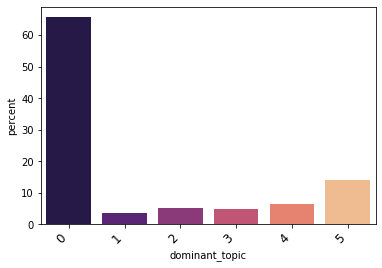

In [161]:
import seaborn as sns
myplot = sns.barplot(x=b['dominant_topic'], y=b['percent'], 
            palette='magma')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                     horizontalalignment='right',
                     fontweight='light',
                      fontsize='large')

<!-- Insights:
As a large portion of negative feedback was on Dress and Blouses, and Pants products (from exploratory analysis), LDA model output give us more insights into these groups of products:

The most frequently complained on Dress items was about size and fitability issues, followed by concerns about fabric/material. There's also a large portion of complains on Dress mentioning wash/color. This can be an issue with the deteriorated quality/color of the Dress after certain times being washed.
Another interesting problem is the issue at zipper and arm area. -->

Documents are heavily allocated to topic Zero (65%), the remaining 5 topics comprises only 35% of 5191 text items. In terms of class allocation balance, LDA performs better.

In conclusion, LSA model performs less than LDA model in terms of topical quality (overlapping) and class balance (unbalance class allocation). 